# Team - Brand Builders

# Team Memberz - Ashwin , BLN Wajith Ali , Mohd Zaid

# Dataset Name: Top-companies


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from wordcloud import WordCloud
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px


In [46]:
# loading the dataset
df =pd.read_csv("E:/Coding notebook/intern/week4/topcompanies(big)/companies.csv")

In [47]:
#printing the data columns with the number of rows and
print(f'The DataSet has {df.shape[1]} columns with the headings of {df.columns} and contains {df.shape[0]} rows')

The DataSet has 10 columns with the headings of Index(['Company_name', 'Description', 'Ratings', 'Highly_rated_for',
       'Critically_rated_for', 'Total_reviews', 'Avg_salary',
       'Interviews_taken', 'Total_jobs_available', 'Total_benefits'],
      dtype='object') and contains 10000 rows


In [48]:
df.head(7)

Company_name                                        Description  Ratings  \
0          TCS  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1    Accenture  IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2    Cognizant  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3        Wipro  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4    Capgemini  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
5    HDFC Bank  Banking | 1 Lakh+ Employees | Public | 30 year...      4.0   
6   ICICI Bank  Banking | 1 Lakh+ Employees | Public | 30 year...      4.0   

                                    Highly_rated_for  \
0                    Job Security, Work Life Balance   
1  Company Culture, Skill Development / Learning,...   
2                       Skill Development / Learning   
3                                       Job Security   
4  Job Security, Work Life Balance, Skill Develop...   
5         Job Security, Skill Development / Learning   
6  Job Security, Skill Development / Learning, Co...   

                        Critically_rated_for Total_reviews Avg_salary  \
0  Promotions / Appraisal, Salary & Benefits         73.1k     856.9k   
1                                        NaN         46.4k     584.6k   
2                     Promotions / Appraisal         41.7k     561.5k   
3  Promotions / Appraisal, Salary & Benefits         39.2k     427.4k   
4  Promotions / Appraisal, Salary & Benefits           34k     414.4k   
5                     Promotions / Appraisal         33.9k     132.3k   
6                                        NaN         33.5k     143.6k   

  Interviews_taken Total_jobs_available Total_benefits  
0             6.1k                  847          11.5k  
1             4.3k                 9.9k           7.1k  
2             3.6k                  460           5.8k  
3             3.7k                  405             5k  
4             2.8k                  719             4k  
5             1.5k                  335           3.2k  
6             1.9k                  215           3.7k

In [49]:
pd.isnull(df).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Company_name  Description  Ratings  Highly_rated_for  \
0            False        False    False             False   
1            False        False    False             False   
2            False        False    False             False   
3            False        False    False             False   
4            False        False    False             False   
...            ...          ...      ...               ...   
9995         False        False    False             False   
9996         False        False    False             False   
9997         False        False    False             False   
9998         False        False    False             False   
9999         False        False    False             False   

      Critically_rated_for  Total_reviews  Avg_salary  Interviews_taken  \
0                    False          False       False             False   
1                     True          False  

# Stage 1: Data Cleansing

In [50]:
# Chalking up missing values 'Ratings' with the median
df['Ratings'].fillna(df['Ratings'].median(), inplace=True)

In [51]:
# Chalking up missig 'critically_rated_for' with 'not available'
df['Critically_rated_for'].fillna('Not Available', inplace=True)

In [52]:
# Ensuring 'ratings' are not out of range 1-5 or else chalking up with NaN
df['Ratings'] =df['Ratings'].apply(lambda x: np.nan if x < 1 or x > 5 else x)

In [53]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [54]:
# Now converting 'k' values to thounds
k_col =['Total_reviews', 'Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits']
df[k_col] =df[k_col].replace({'k':''}, regex=True)
df[k_col] =df[k_col].replace('--', np.nan)
df[k_col] =df[k_col].apply(pd.to_numeric)
df[k_col] *=1000

In [55]:
# Ensuring company names as str
df['Company_name'] =df['Company_name'].str.title()

In [56]:
reviews =df['Description'].dropna()
text =' '.join(reviews)

In [57]:
df.shape

(9359, 10)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_name          9359 non-null   object 
 1   Description           9359 non-null   object 
 2   Ratings               9359 non-null   float64
 3   Highly_rated_for      9274 non-null   object 
 4   Critically_rated_for  9359 non-null   object 
 5   Total_reviews         9359 non-null   float64
 6   Avg_salary            9357 non-null   float64
 7   Interviews_taken      9168 non-null   float64
 8   Total_jobs_available  5744 non-null   float64
 9   Total_benefits        9283 non-null   float64
dtypes: float64(6), object(4)
memory usage: 804.3+ KB


In [59]:
df.head(7)

Company_name                                        Description  Ratings  \
0          Tcs  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
1    Accenture  IT Services & Consulting | 1 Lakh+ Employees |...      4.0   
2    Cognizant  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
3        Wipro  IT Services & Consulting | 1 Lakh+ Employees |...      3.8   
4    Capgemini  IT Services & Consulting | 1 Lakh+ Employees |...      3.9   
5    Hdfc Bank  Banking | 1 Lakh+ Employees | Public | 30 year...      4.0   
6   Icici Bank  Banking | 1 Lakh+ Employees | Public | 30 year...      4.0   

                                    Highly_rated_for  \
0                    Job Security, Work Life Balance   
1  Company Culture, Skill Development / Learning,...   
2                       Skill Development / Learning   
3                                       Job Security   
4  Job Security, Work Life Balance, Skill Develop...   
5         Job Security, Skill Development / Learning   
6  Job Security, Skill Development / Learning, Co...   

                        Critically_rated_for  Total_reviews  Avg_salary  \
0  Promotions / Appraisal, Salary & Benefits        73100.0    856900.0   
1                              Not Available        46400.0    584600.0   
2                     Promotions / Appraisal        41700.0    561500.0   
3  Promotions / Appraisal, Salary & Benefits        39200.0    427400.0   
4  Promotions / Appraisal, Salary & Benefits        34000.0    414400.0   
5                     Promotions / Appraisal        33900.0    132300.0   
6                              Not Available        33500.0    143600.0   

   Interviews_taken  Total_jobs_available  Total_benefits  
0            6100.0              847000.0         11500.0  
1            4300.0                9900.0          7100.0  
2            3600.0              460000.0          5800.0  
3            3700.0              405000.0          5000.0  
4            2800.0              719000.0          4000.0  
5            1500.0              335000.0          3200.0  
6            1900.0              215000.0          3700.0

In [60]:
missing_values =df['Avg_salary'].isnull().sum()
print("Number of missing values in 'Avg_salary':", missing_values)

Number of missing values in 'Avg_salary': 2


In [61]:
infinite_values =np.isinf(df['Avg_salary']).sum()
print("Number of infinite values in 'Avg_salary':", infinite_values)

Number of infinite values in 'Avg_salary': 0


In [62]:
df =df.dropna(subset=['Avg_salary'])
df =df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Avg_salary'])

In [63]:
# converting high_rated_for to binanry
highly_rated_for =df['Highly_rated_for'].str.get_dummies(', ')


# Stage 2 : Decriptive Analysis

In [64]:
"""Average Ratings and Reviews:
Question: What is the average company rating within our industry, and how do review volumes correlate with these ratings? Does a higher volume of reviews imply higher credibility and therefore higher ratings?
"""

'Average Ratings and Reviews:\nQuestion: What is the average company rating within our industry, and how do review volumes correlate with these ratings? Does a higher volume of reviews imply higher credibility and therefore higher ratings?\n'

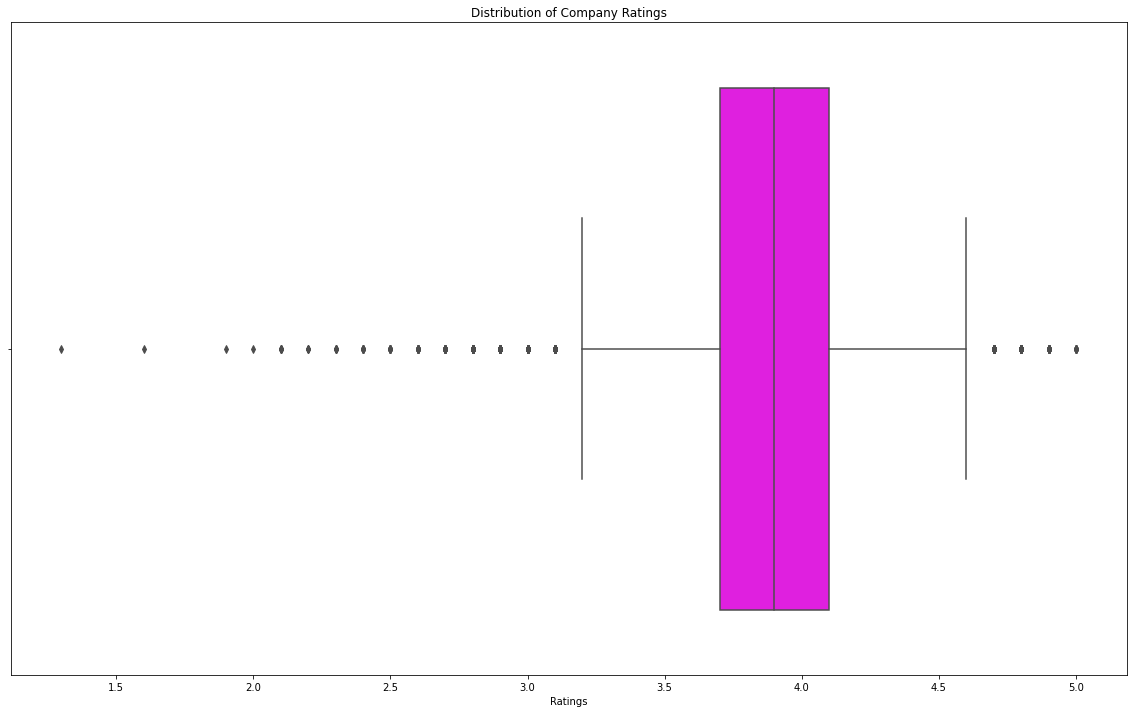

In [65]:
# Box plotting for the rating distribution
plt.figure(figsize=(20, 12))
sns.boxplot(x='Ratings', data=df, color='magenta')
plt.title('Distribution of Company Ratings')
plt.xlabel('Ratings')
plt.show()

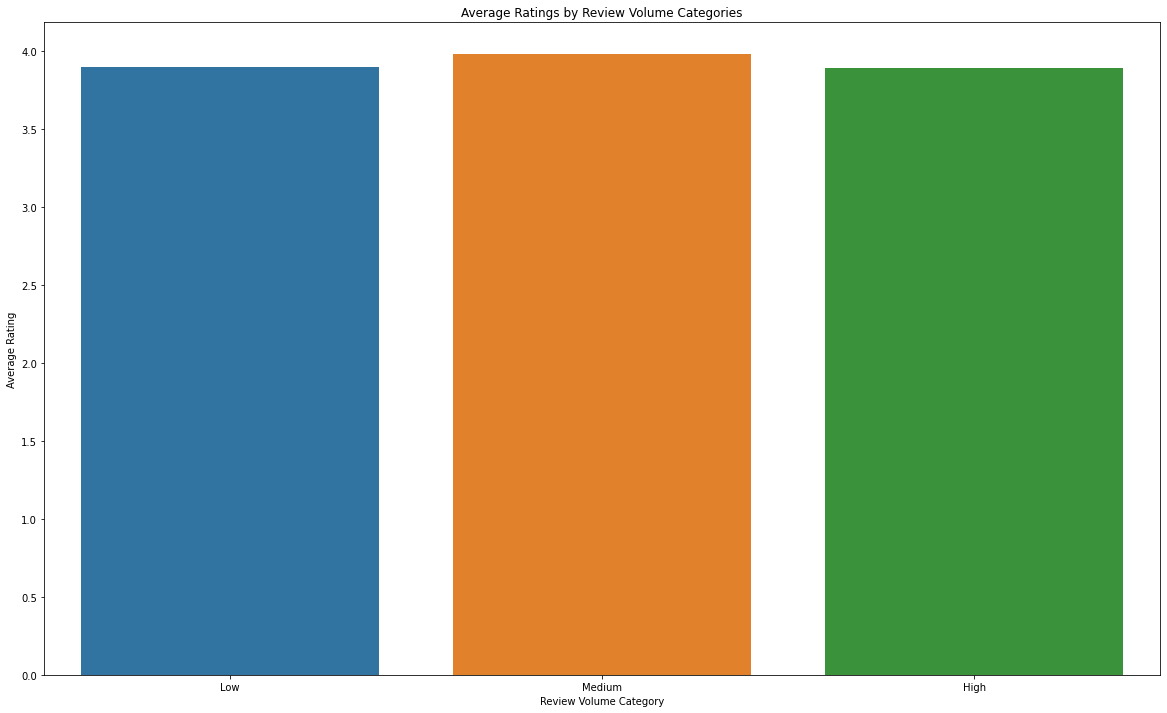

In [66]:
# categorizing reviews into 'low', 'medium' and 'High'
# Average ratings by review
plt.figure(figsize=(20, 12))
bins =[0,1000,5000, np.inf]
labels =['Low', 'Medium', 'High']
df['Review_Volume_Category'] = pd.cut(df['Total_reviews'], bins=bins , labels=labels)

category_avg_ratings =df.groupby('Review_Volume_Category')['Ratings'].mean().reset_index()
sns.barplot(x='Review_Volume_Category', y='Ratings', data=category_avg_ratings)
plt.title('Average Ratings by Review Volume Categories')
plt.xlabel('Review Volume Category')
plt.ylabel('Average Rating')
plt.show()

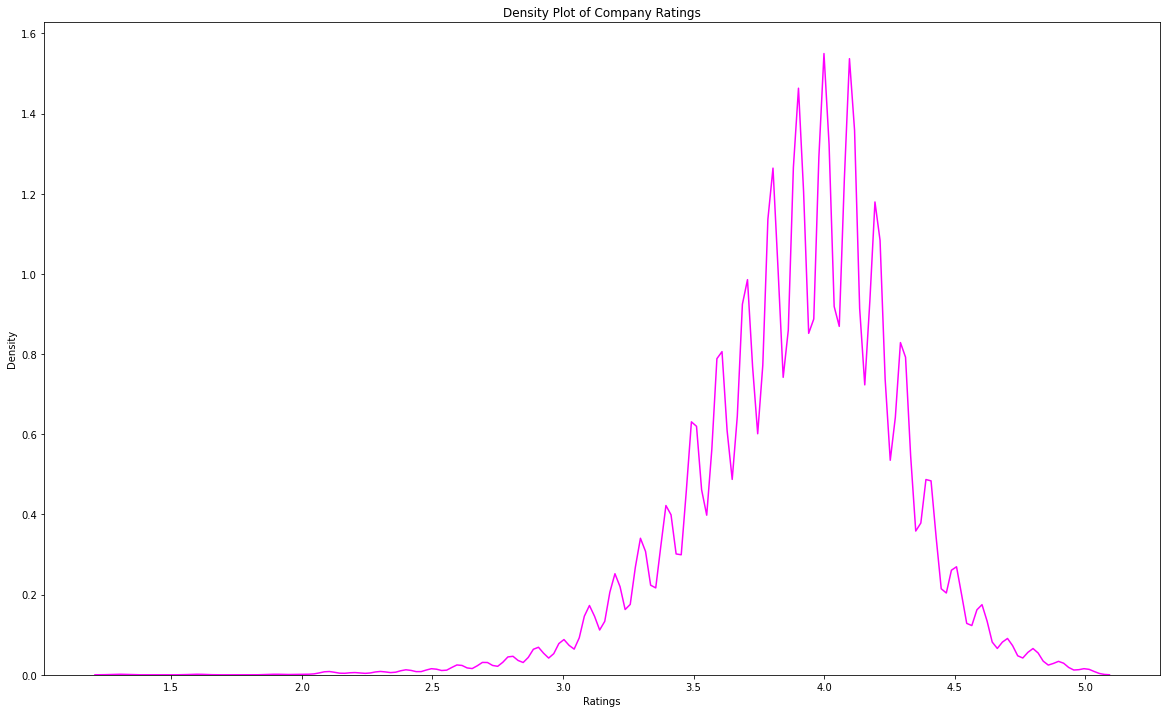

In [67]:
# Use of DEnsity plot for Ratings
plt.figure(figsize=(20, 12))
sns.kdeplot(df['Ratings'], bw_adjust=0.5, color='magenta')
plt.title('Density Plot of Company Ratings')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.show()

In [68]:
"""Salary and Benefits Overview:
Question: How do average salaries and the scale of benefits offered by companies correlate with their overall ratings? Are companies that offer higher salaries and more extensive benefits packages perceived more favorably?
"""

'Salary and Benefits Overview:\nQuestion: How do average salaries and the scale of benefits offered by companies correlate with their overall ratings? Are companies that offer higher salaries and more extensive benefits packages perceived more favorably?\n'

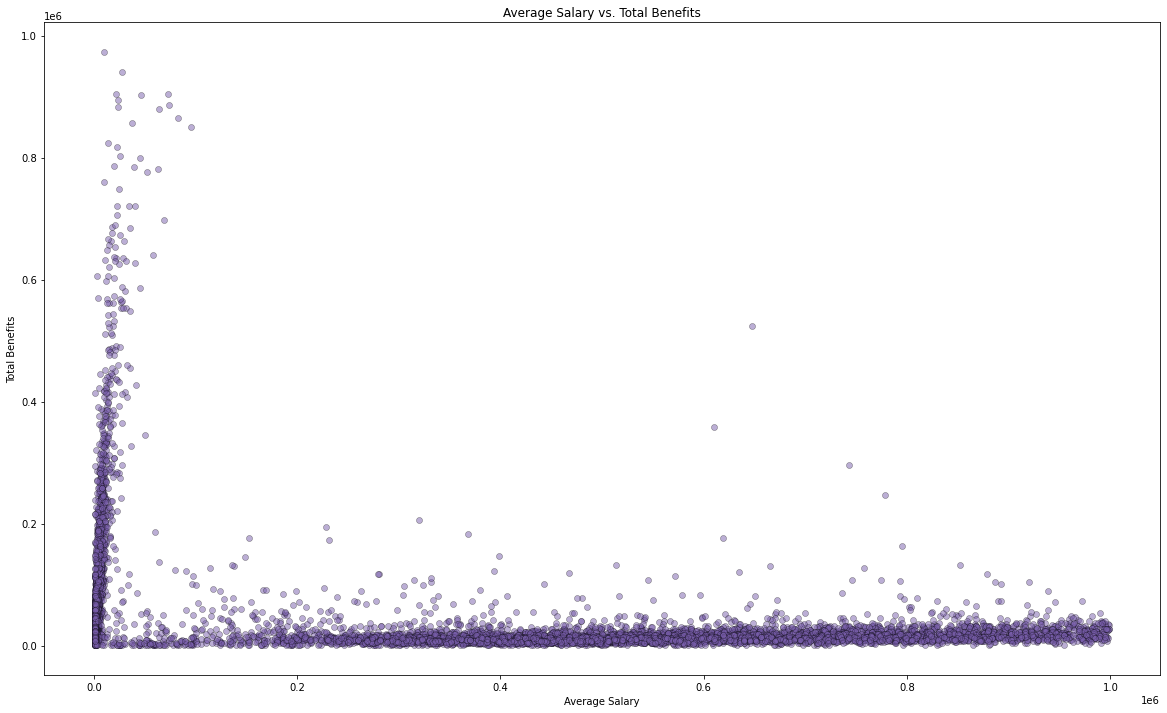

In [69]:
# Plotting scatter plot to visualise the relationship between avrage salary and total benefits
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Avg_salary', y='Total_benefits', data=df, color='#795eac', alpha=0.5, edgecolor='black')
plt.title('Average Salary vs. Total Benefits')
plt.xlabel('Average Salary')
plt.ylabel('Total Benefits')
plt.show()


In [70]:
# Plotting Radar chart to compare different aspects of benefits across companies
# defining the benfit categorires
benefit_cat =['Avg_salary', 'Interviews_taken', 'Total_jobs_available', 'Total_benefits', 'Total_reviews']
# Normalizing the benfits column
for cat in benefit_cat:
    df[cat] =(df[cat] - df[cat].min()) / (df[cat].max() - df[cat].min())
    
benefit_means =df[benefit_cat].mean()

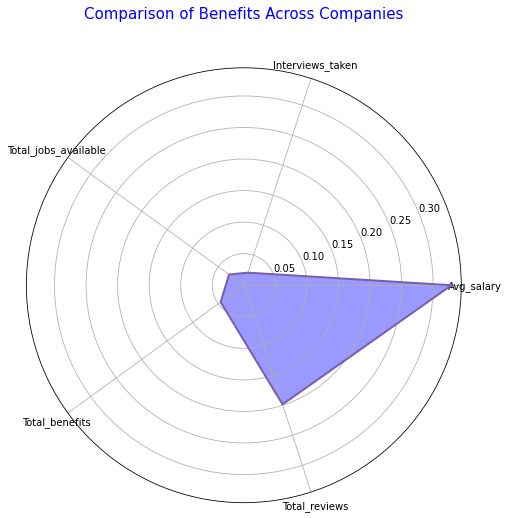

In [71]:
angles =[n / float(len(benefit_cat)) * 2 * math.pi for n in range(len(benefit_cat))]
angles +=angles[:1]
# plotting radar chart
plt.figure(figsize=(8, 8))
ax =plt.subplot(111, polar=True)
plt.xticks(angles[:-1], benefit_cat, color='black', size=10)
ax.plot(angles, list(benefit_means) + [benefit_means[0]], color='#795eac', linewidth=2, linestyle='solid')
ax.fill(angles, list(benefit_means) + [benefit_means[0]], 'blue', alpha=0.4)
plt.title('Comparison of Benefits Across Companies', size=15, color='blue', y=1.1)
plt.show()

In [72]:
"""Job Market Snapshot:
Question: What is the current landscape of the job market in terms of available positions and the volume of interviews conducted across top-rated companies? Does a higher number of job openings or interviews correlate with company ratings, suggesting a more dynamic and growth-oriented organization?
"""

'Job Market Snapshot:\nQuestion: What is the current landscape of the job market in terms of available positions and the volume of interviews conducted across top-rated companies? Does a higher number of job openings or interviews correlate with company ratings, suggesting a more dynamic and growth-oriented organization?\n'

c:\Users\Wajith Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


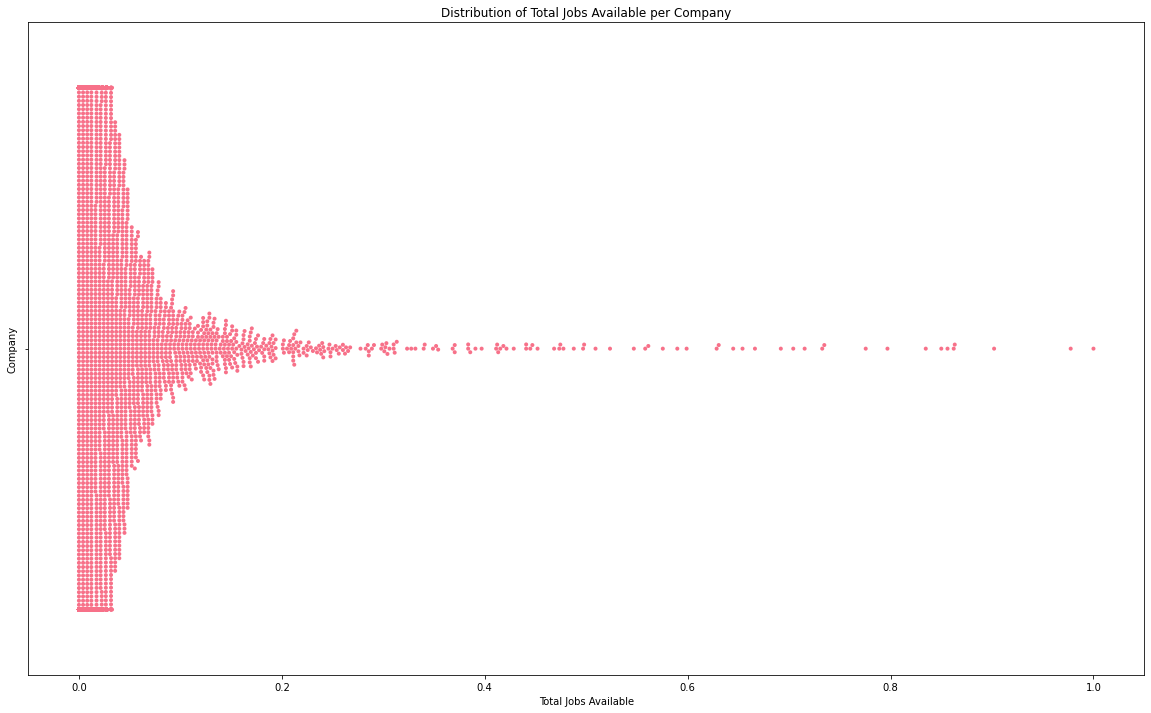

In [73]:
# plotting swarm plot to show job availability with respect to company
palette =sns.color_palette("husl", 10)
plt.figure(figsize=(20, 12))
sns.swarmplot(x=df['Total_jobs_available'], palette=palette, size=4)
plt.title('Distribution of Total Jobs Available per Company')
plt.xlabel('Total Jobs Available')
plt.ylabel('Company')
plt.show()


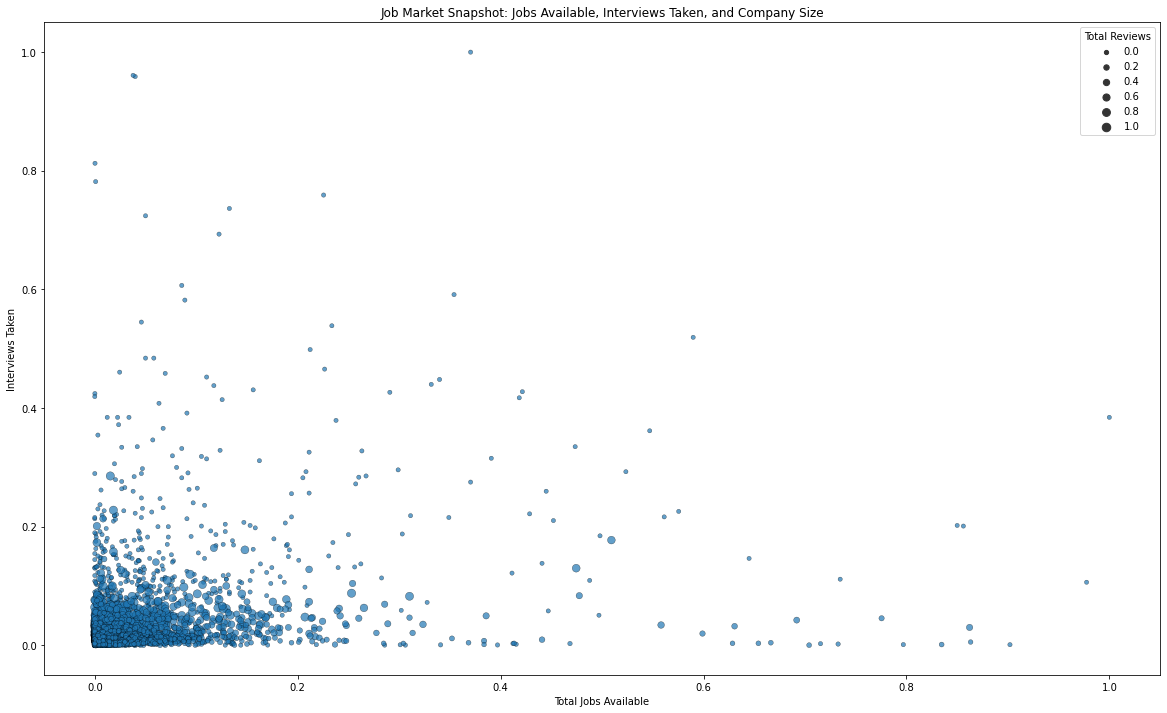

In [74]:
# Bubble chart to represent jobs available, interviews taken and company size via total reviews.
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Total_jobs_available', y='Interviews_taken', size='Total_reviews', data=df, alpha=0.7, edgecolor='black')
plt.title('Job Market Snapshot: Jobs Available, Interviews Taken, and Company Size')
plt.xlabel('Total Jobs Available')
plt.ylabel('Interviews Taken')
plt.legend(title='Total Reviews')
plt.show()

# Stage 3 : Diagnostic Analysis

In [75]:
"""Factors Influencing Ratings:
Question: Beyond salary and benefits, what factors significantly influence company ratings within our dataset? How do aspects like company culture, advancement opportunities, or work-life balance play into these ratings?
"""

'Factors Influencing Ratings:\nQuestion: Beyond salary and benefits, what factors significantly influence company ratings within our dataset? How do aspects like company culture, advancement opportunities, or work-life balance play into these ratings?\n'

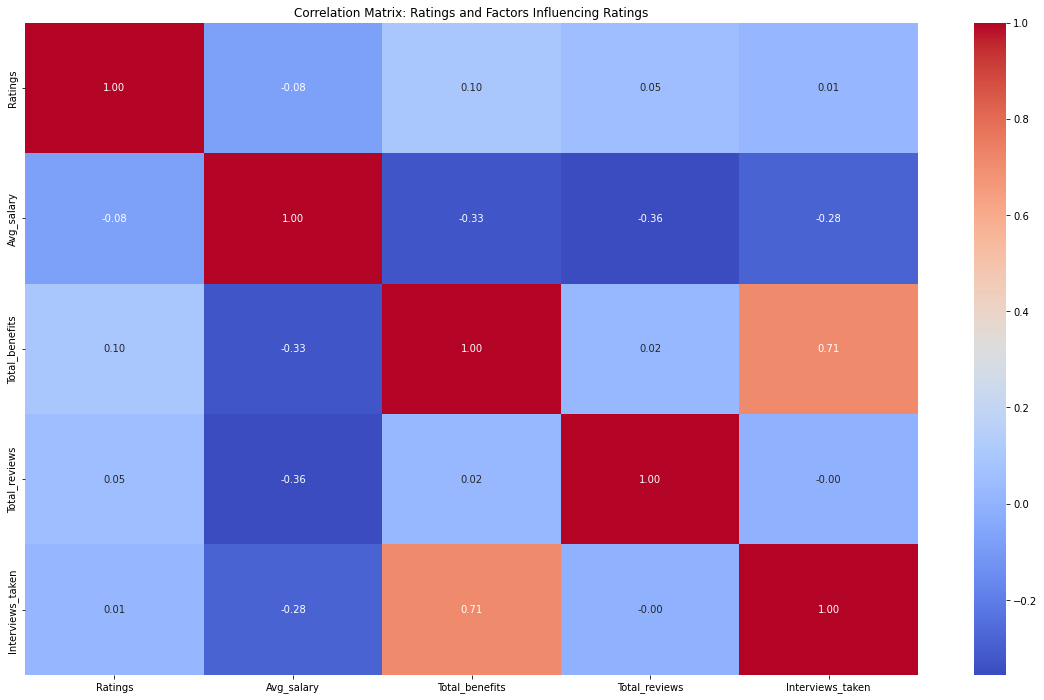

In [76]:
# Heatmap to show correlation between company ratings and various factors like salary, benfits etc...
correlation_columns =['Ratings', 'Avg_salary', 'Total_benefits', 'Total_reviews', 'Interviews_taken']
correlation_matrix =df[correlation_columns].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix: Ratings and Factors Influencing Ratings')
plt.show()

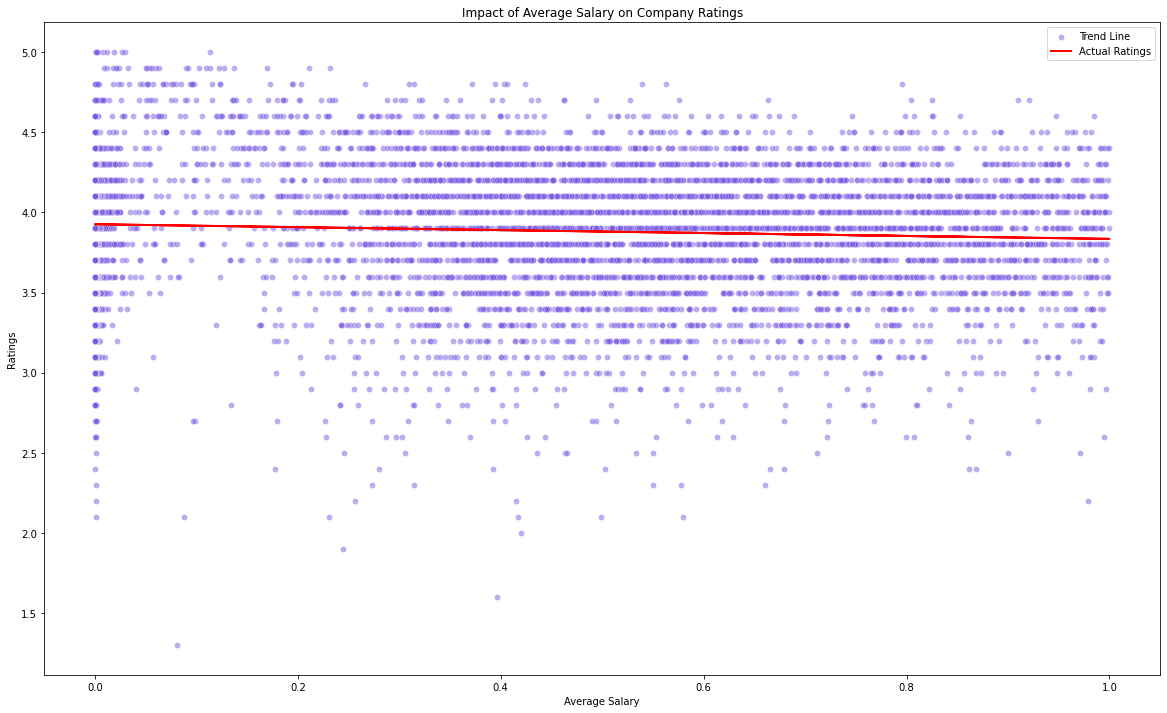

In [77]:
# Scatter plot to analze the impact of average salary on company ratings
x =df['Avg_salary']
y =df['Ratings']
x =sm.add_constant(x)
model =sm.OLS(y,x).fit()
preds =model.predict(x)
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Avg_salary', y='Ratings', data=df, color='#795ae5', alpha=0.5)
plt.plot(df['Avg_salary'], preds, color='red', linewidth=2)
plt.title('Impact of Average Salary on Company Ratings')
plt.xlabel('Average Salary')
plt.ylabel('Ratings')
plt.legend(['Trend Line', 'Actual Ratings'])
plt.show()

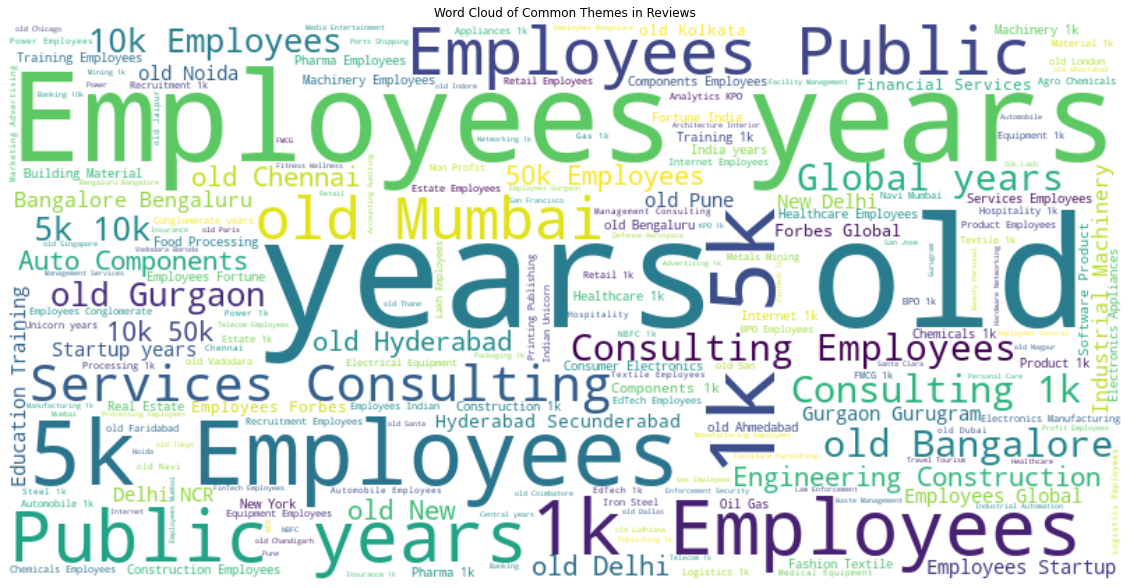

In [78]:
#using wordcloud to display common themes in reviews
word =WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(20, 12))
plt.imshow(word, interpolation='bilinear')
plt.title('Word Cloud of Common Themes in Reviews')
plt.axis('off')
plt.show()

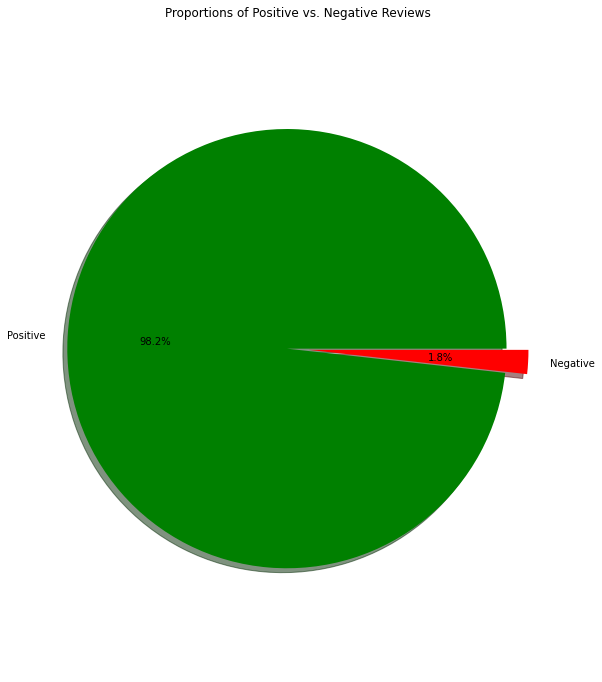

In [79]:
# sentiment analysis using pie chart to show the proposrtions of positive vs negative reviews
posi_reviews =df[df['Ratings']>= 3]
nega_reviews =df[df['Ratings']< 3]
plt.figure(figsize=(20, 12))
explode =(0.1,0)
plt.subplot(1, 2, 1)
plt.pie([len(posi_reviews), len(nega_reviews)], labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['green', 'red'], explode=explode, shadow=True)
plt.title('Proportions of Positive vs. Negative Reviews')
plt.axis('equal')
plt.show()

In [80]:
"""Industry-Specific Trends:
Question: How do work environment factors such as culture, work-life balance, and advancement opportunities vary across industries, and how do these variations impact industry-specific performance metrics including employee satisfaction and retention rates?
"""

'Industry-Specific Trends:\nQuestion: How do work environment factors such as culture, work-life balance, and advancement opportunities vary across industries, and how do these variations impact industry-specific performance metrics including employee satisfaction and retention rates?\n'

In [81]:
industry_category =df['Description'].str.split('|').str[0].str.strip().str.replace('|', '')

C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_16440\2956890646.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  industry_category =df['Description'].str.split('|').str[0].str.strip().str.replace('|', '')


In [82]:
print(industry_category.head(100))

0              IT Services & Consulting
1              IT Services & Consulting
2              IT Services & Consulting
3              IT Services & Consulting
4              IT Services & Consulting
                    ...                
95                Industrial Automation
96                          Real Estate
97                           Healthcare
98           Engineering & Construction
99    Consumer Electronics & Appliances
Name: Description, Length: 100, dtype: object


In [83]:
industry_category =industry_category.drop_duplicates()

In [84]:
print(industry_category.head(100))

0                IT Services & Consulting
5                                 Banking
12                                    BPO
14                                Telecom
15                               Internet
                      ...                
1754                      Mumbai +12 more
1780     Hyderabad / Secunderabad +1 more
1831    Hyderabad / Secunderabad +38 more
1927         Gurgaon / Gurugram +138 more
1978                      Import & Export
Name: Description, Length: 100, dtype: object


C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_16440\2906255803.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  industry_data = df[df['Description'].str.split('|').str[0].str.strip().str.replace('|', '') == industry]


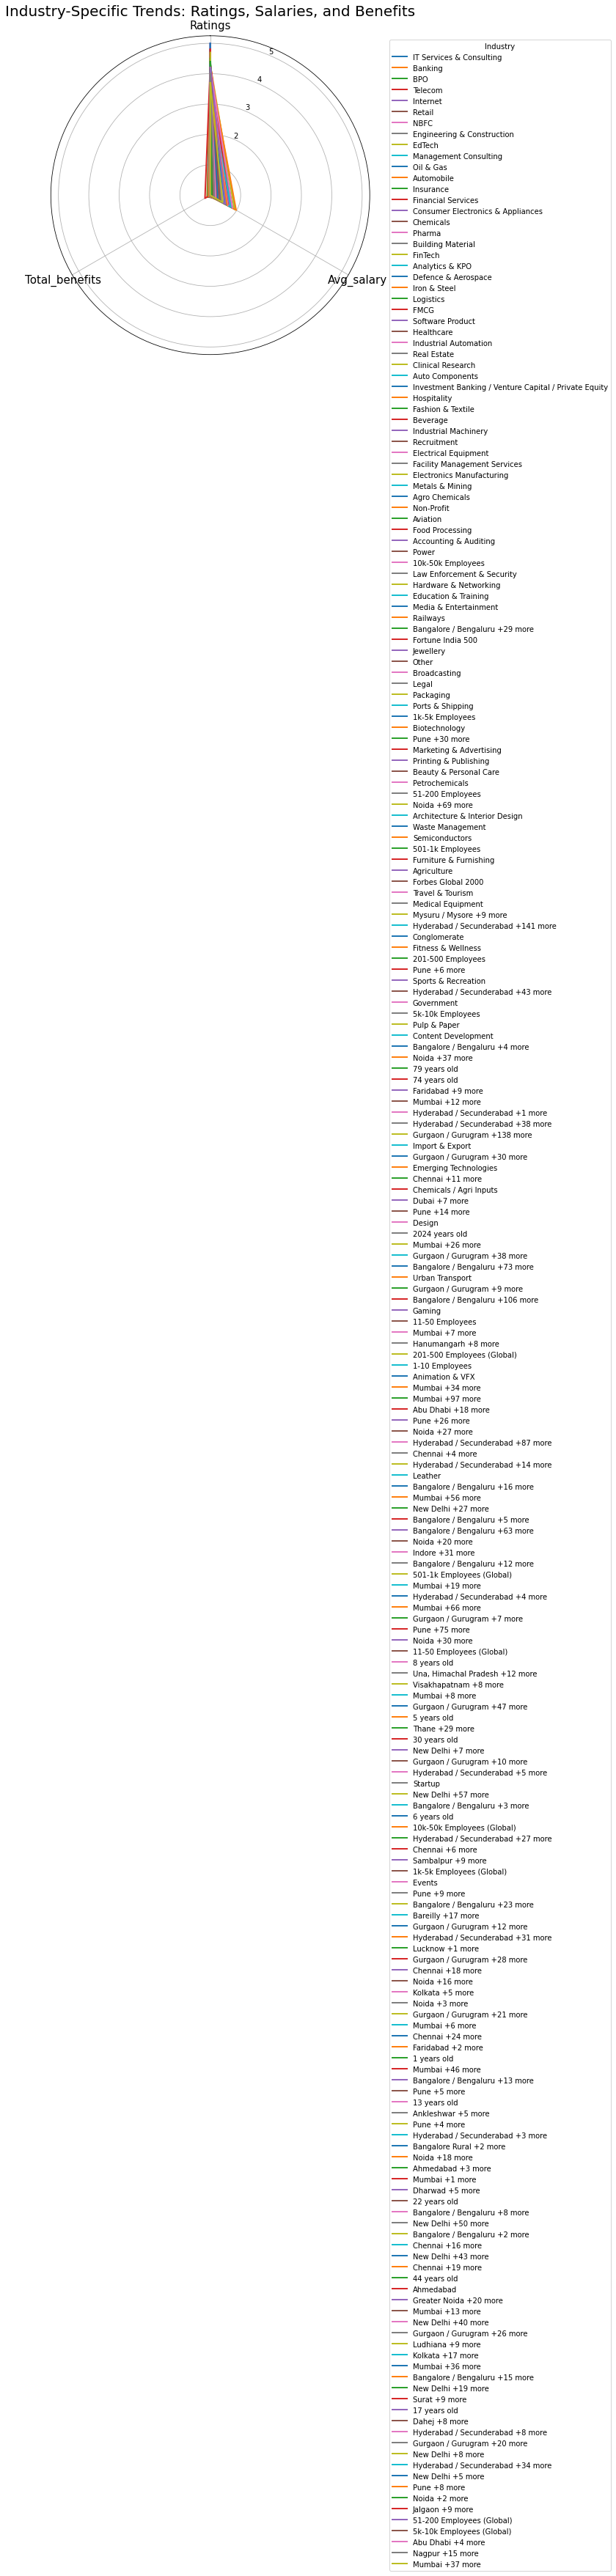

In [85]:
# Radar Chart (to compare industry-specific ratings, salaries, and benefits), 
categories = ['Ratings', 'Avg_salary', 'Total_benefits']
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, color='black', size=15)
for industry in industry_category.unique():
    industry_data = df[df['Description'].str.split('|').str[0].str.strip().str.replace('|', '') == industry]
    values = [industry_data[category].mean() for category in categories]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=industry)
    ax.fill(angles, values, alpha=0.1)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Industry")
plt.title('Industry-Specific Trends: Ratings, Salaries, and Benefits', size=20, position=(0.5, 1.1))
plt.show()

c:\Users\Wajith Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


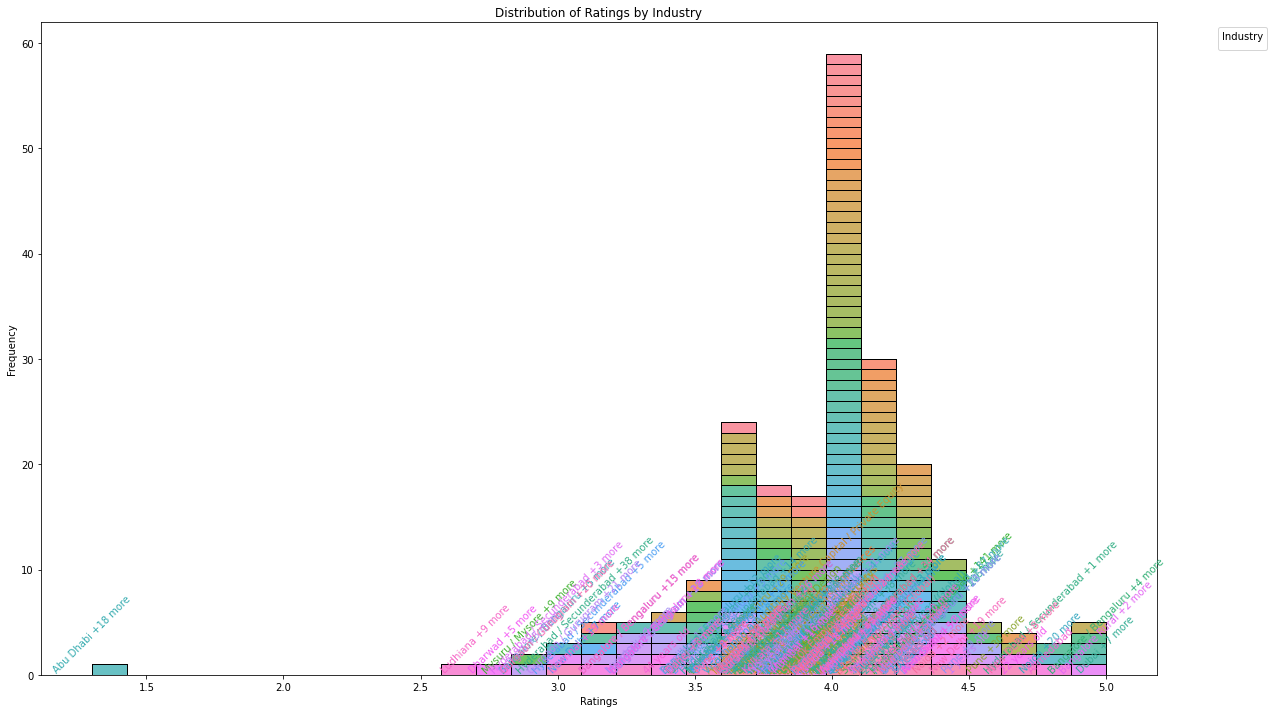

c:\Users\Wajith Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


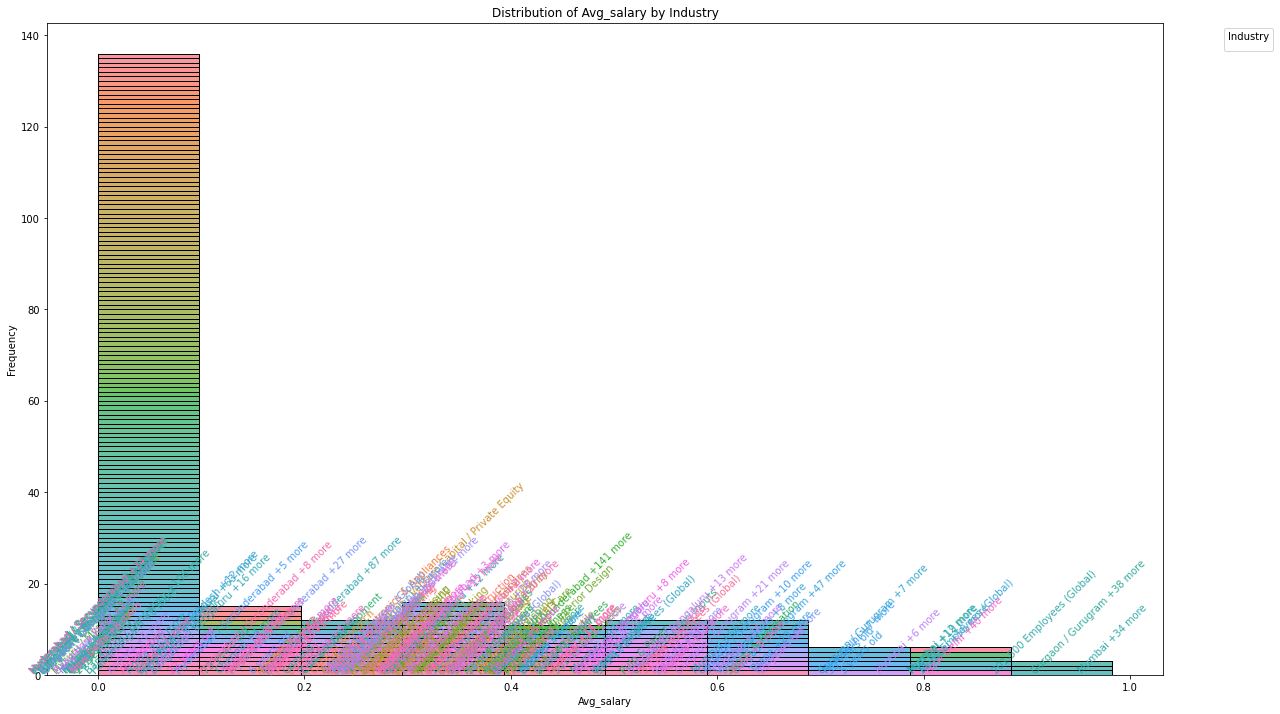

In [86]:
histogram_categories =['Ratings', 'Avg_salary']
industry_colors =sns.color_palette('husl', n_colors=len(industry_category.unique()))
for category in histogram_categories:
    plt.figure(figsize=(20, 12))
    sns.histplot(data=df, x=category, hue=industry_category, multiple="stack", palette=industry_colors)
    plt.title(f'Distribution of {category} by Industry')
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
    for industry, color in zip(industry_category.unique(), industry_colors):
        plt.text(df[df['Description'].str.split('|').str[0].str.strip() == industry][category].mean(), 0, industry, rotation=45, ha='center', va='bottom', color=color)
    plt.show()

#  Stage 4 : Predictive Analysis

In [87]:
"""Ratings Forecasting for Strategic Growth
Question: How can we forecast company ratings over the next fiscal year based on historical trends, market dynamics, and internal changes, to guide strategic growth initiatives and enhance our competitive position in the market?
"""

'Ratings Forecasting for Strategic Growth\nQuestion: How can we forecast company ratings over the next fiscal year based on historical trends, market dynamics, and internal changes, to guide strategic growth initiatives and enhance our competitive position in the market?\n'

In [88]:
# plotting scatter plot with prediction lien for ratings trends 
df['Index'] =np.arange(len(df))
X =df['Index'].values.reshape(-1,1)
y =df['Ratings']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model =LinearRegression()
model.fit(X_train, y_train)

y_prediction  =model.predict(X_test)

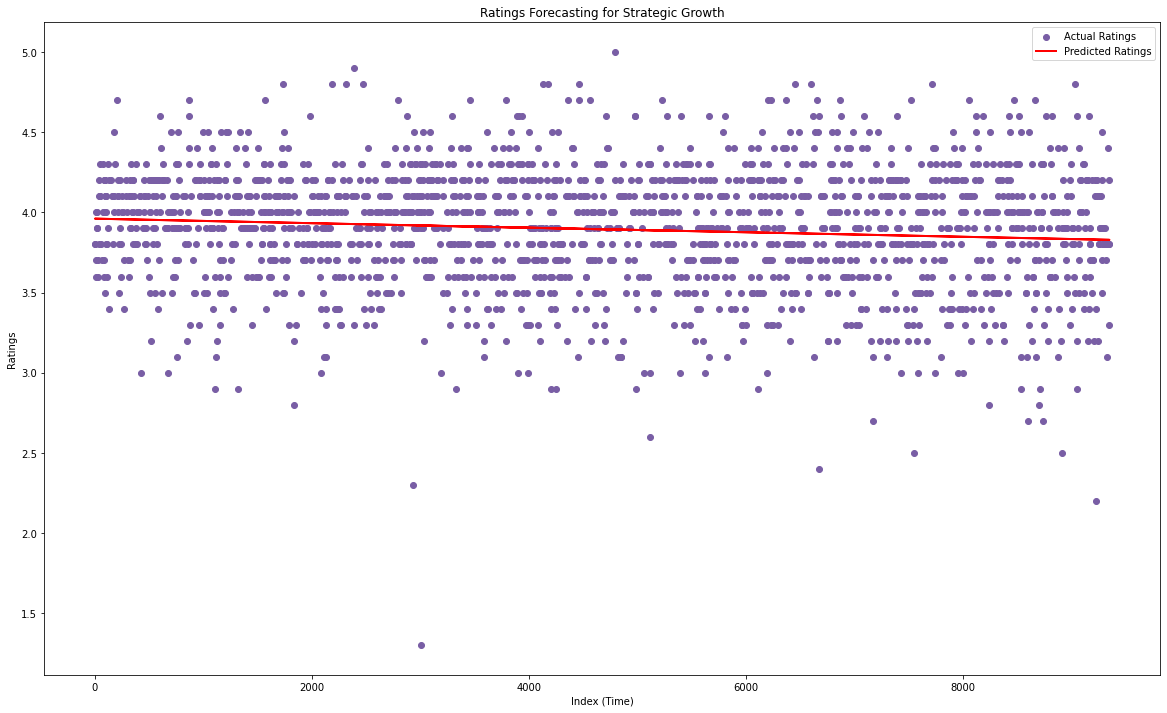

In [89]:
plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='#795ea5', label='Actual Ratings')
plt.plot(X_test, y_prediction, color='red', linewidth=2, label='Predicted Ratings')
plt.title('Ratings Forecasting for Strategic Growth')
plt.xlabel('Index (Time)')
plt.ylabel('Ratings')
plt.legend()
plt.show()

In [90]:
"""Anticipating Salary and Job Market Trends to Inform HR Policies
Question: In the face of evolving economic indicators and industry-specific developments, how can we predict salary trends and job market shifts over the next quarter to adjust our HR policies, recruitment strategies, and budget allocations effectively?
"""

'Anticipating Salary and Job Market Trends to Inform HR Policies\nQuestion: In the face of evolving economic indicators and industry-specific developments, how can we predict salary trends and job market shifts over the next quarter to adjust our HR policies, recruitment strategies, and budget allocations effectively?\n'

In [91]:
# predicting salary trends with line charts
X_salary =df[['Total_reviews', 'Interviews_taken', 'Total_benefits']]
y_salary =df['Avg_salary']
X_jobs =df[['Ratings', 'Total_jobs_available']]
y_jobs =df['Total_jobs_available']

In [92]:
X_salary.dropna(inplace=True)
y_salary =y_salary[X_salary.index]
X_jobs.dropna(inplace=True)
y_jobs =y_jobs[X_jobs.index]

C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_16440\68118404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_salary.dropna(inplace=True)
C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_16440\68118404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_jobs.dropna(inplace=True)


In [93]:
X_salary_train, X_salary_test, y_salary_train, y_salary_test =train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)
model_salary =LinearRegression()
model_salary.fit(X_salary_train, y_salary_train)
y_salary_prediction =model_salary.predict(X_salary_test)

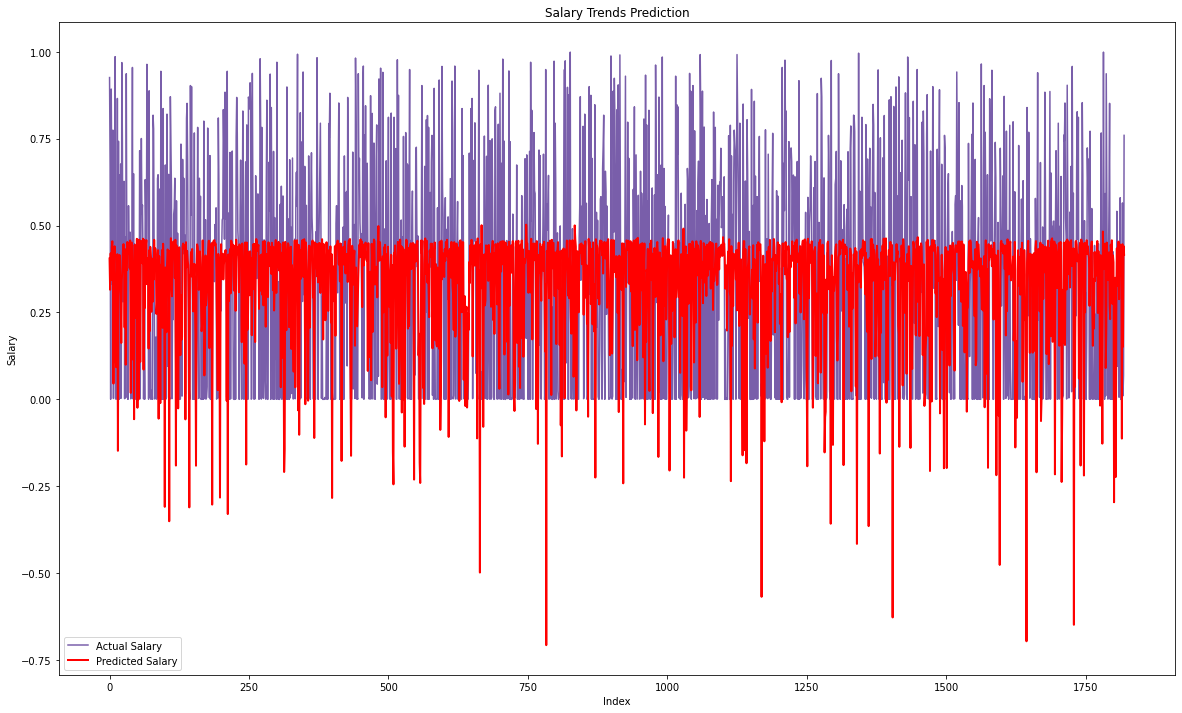

In [94]:
plt.figure(figsize=(20, 12))
plt.plot(range(len(y_salary_test)), y_salary_test, color='#795eaa', label='Actual Salary')
plt.plot(range(len(y_salary_test)), y_salary_prediction, color='red', linewidth=2, label='Predicted Salary')
plt.title('Salary Trends Prediction')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [104]:
X_jobs_train, X_jobs_test, y_jobs_train, y_jobs_test =train_test_split(X_jobs, y_jobs, test_size=0.2, random_state=42)
model_jobs =LinearRegression()
model_jobs.fit(X_jobs_train, y_jobs_train)
y_jobs_prediction =model_jobs.predict(X_jobs_test)
sizes =np.abs(y_jobs_prediction)

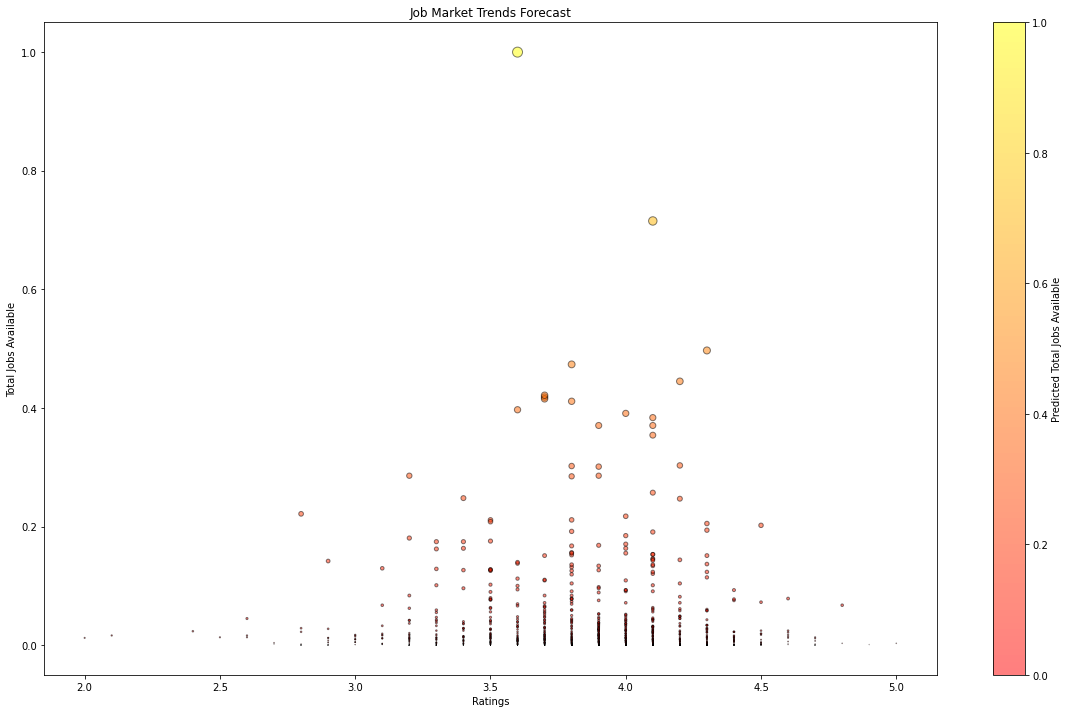

In [106]:
colors =[(1, 0, 0), (1, 1, 0)]
custom_cmap =LinearSegmentedColormap.from_list('red_to_yellow', colors, N=100)
plt.figure(figsize=(20, 12))
plt.scatter(X_jobs_test['Ratings'], X_jobs_test['Total_jobs_available'], s=sizes * 100, c=sizes, cmap=custom_cmap, alpha=0.5, edgecolor='black')
plt.title('Job Market Trends Forecast')
plt.xlabel('Ratings')
plt.ylabel('Total Jobs Available')
plt.colorbar(label='Predicted Total Jobs Available')
plt.show()

In [97]:
"""Predicting Employee Satisfaction for Organizational Health
Question: Utilizing predictive analytics and machine learning, how can we predict changes in employee satisfaction and its impact on turnover rates, productivity, and overall organizational health, to proactively address potential issues and foster a positive work environment?
"""

'Predicting Employee Satisfaction for Organizational Health\nQuestion: Utilizing predictive analytics and machine learning, how can we predict changes in employee satisfaction and its impact on turnover rates, productivity, and overall organizational health, to proactively address potential issues and foster a positive work environment?\n'

In [98]:
# plotting scatter plot prediciting employee statisfaction based on factors
X_factors =pd.concat([df[['Ratings', 'Avg_salary', 'Total_benefits']], highly_rated_for], axis=1)
y_satisfaction =df['Total_reviews']

In [99]:
X_factors.dropna(inplace=True)
y_satisfaction =y_satisfaction[X_factors.index]

In [100]:
X_train, X_test, y_train, y_test =train_test_split(X_factors, y_satisfaction, test_size=0.2, random_state=42)
model =LinearRegression()
model.fit(X_train, y_train)
y_prediction =model.predict(X_test)

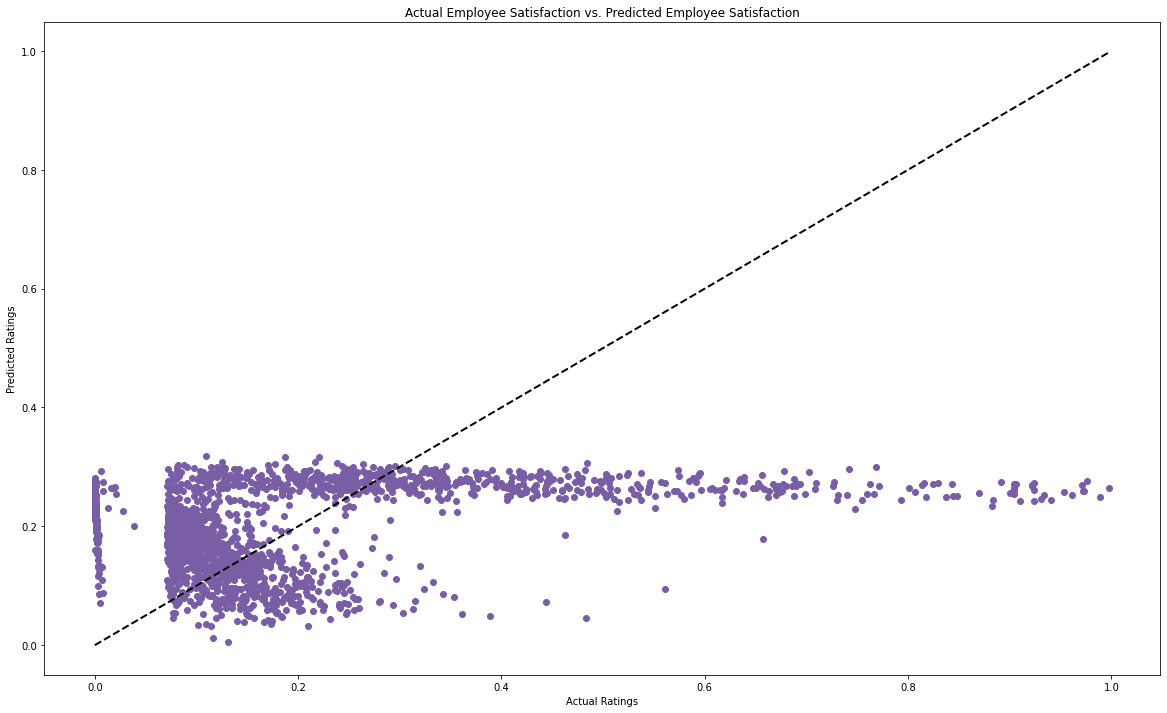

In [101]:
plt.figure(figsize=(20, 12))
plt.scatter(y_test, y_prediction, color='#795ea5')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual Employee Satisfaction vs. Predicted Employee Satisfaction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

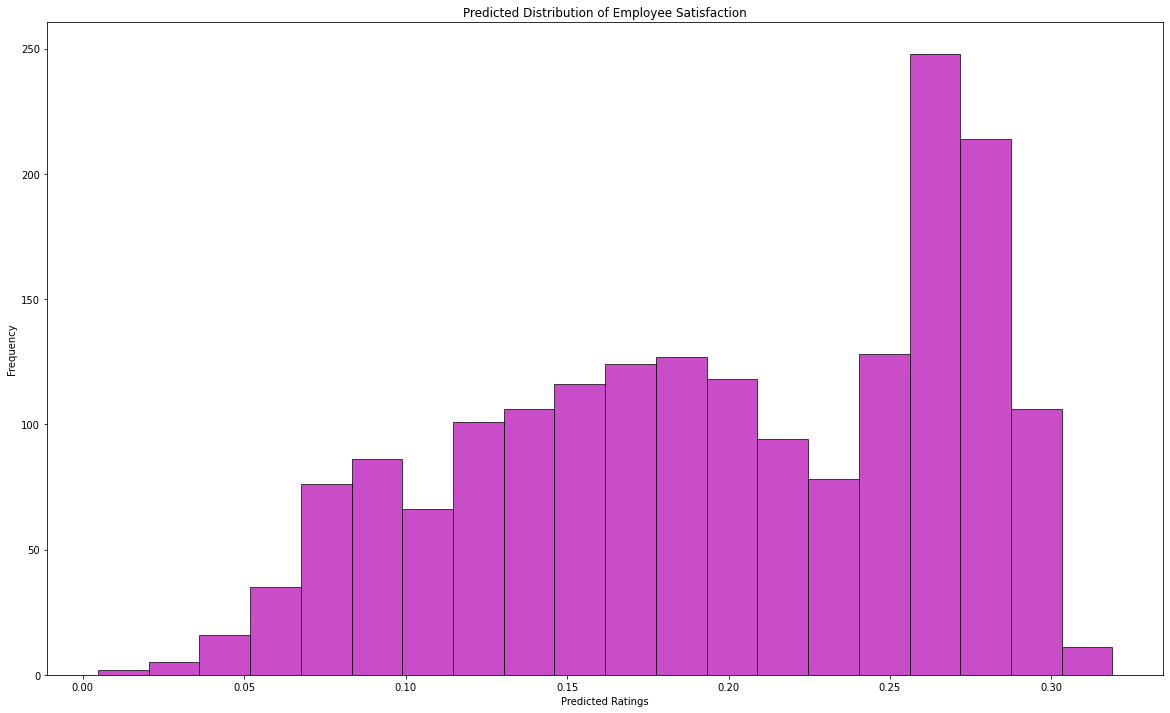

In [102]:
# plotting histogram to predict distrubution of ratings
plt.figure(figsize=(20, 12))
plt.hist(y_prediction, bins=20, color='#b300b3', alpha=0.7, edgecolor='black')
plt.title('Predicted Distribution of Employee Satisfaction')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()

# Sateg 5 : Precriptive Analysis

In [ ]:
"""Improvement Recommendations for Companies:
Question: Given the insights from our analyses, what are specific, actionable strategies that companies can implement to improve their ratings? How can organizations balance the need to remain competitive in terms of salary and benefits with other factors such as company culture or employee development opportunities?
"""

C:\Users\Wajith Ali\AppData\Local\Temp\ipykernel_16440\591951499.py:12: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



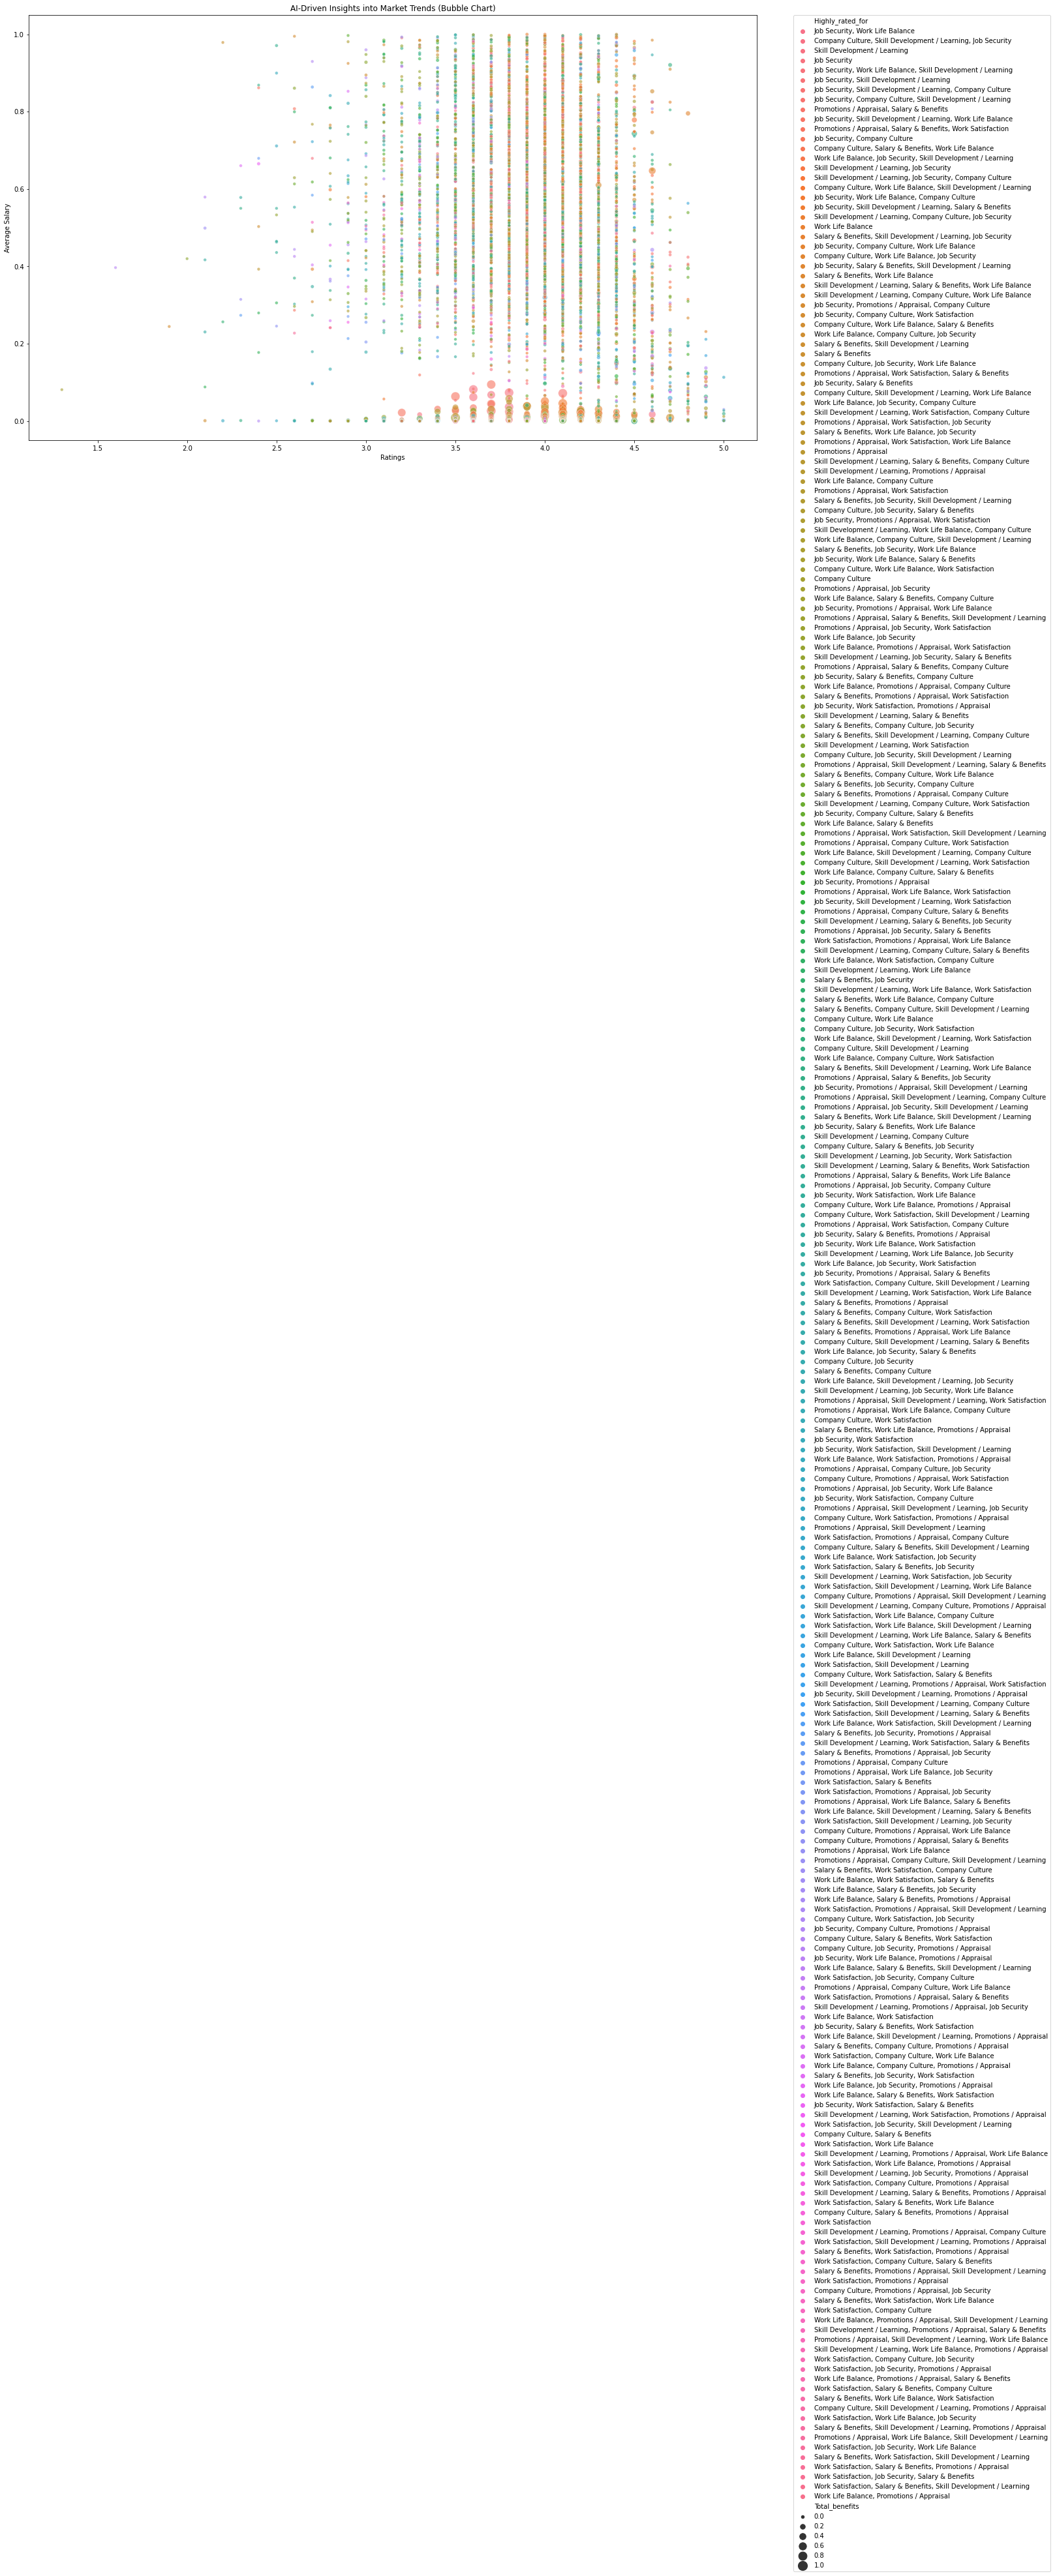

In [107]:
predictions = np.random.rand(9)
recommendations = ['Feedback', 'Compensation', 'Training', 'Balance', 'Benefits', 'Culture', 'Mentorship', 'Advancement', 'Engagement']
fig = px.bar(x=recommendations, y=predictions, labels={'x': 'Recommendation', 'y': 'Probability'}, title='AI Predictions and Recommendations')
fig.update_layout(xaxis_tickangle=-45)
fig.show()
plt.figure(figsize=(20, 12))
bubble = sns.scatterplot(data=df, x='Ratings', y='Avg_salary', size='Total_benefits', hue='Highly_rated_for', sizes=(20, 200), alpha=0.6, legend='brief')
plt.title('AI-Driven Insights into Market Trends (Bubble Chart)')
plt.xlabel('Ratings')
plt.ylabel('Average Salary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()